In [1]:
seed_value= 30
import numpy as np
np.random.seed(seed_value)
import matplotlib.pyplot as plt
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import cv2
from tqdm import tqdm
from random import shuffle
import random
random.seed(seed_value)

In [2]:
DATADIR = "F:\\IIT KANPUR MTECH STUDY MATERIAL\\THESIS\\Data  of Dyslexic and Non Dyslexic Children in Hindi\\Both Data"
#DATADIR = "F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\Both Data"
CATEGORIES = ["Dyslexia", "Non Dyslexia"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        #plt.imshow(img_array, cmap='gray')  # graph it
        #plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
    

In [3]:
IMG_SIZE =30

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#plt.imshow(new_array, cmap='gray')
#plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dyslexia 1=non dyslexia

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
create_training_data()

print(len(training_data))
#print(training_data)

100%|██████████| 41/41 [00:00<00:00, 169.94it/s]

83


In [5]:
import random

random.shuffle(training_data)
#for sample in training_data[:17]:
   # print(sample[1])

In [6]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(X.shape)
print(y)

(83, 30, 30, 1)
[1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]


In [7]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [14]:
import tensorflow as tf
tf.set_random_seed(seed_value)
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:],activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.9,seed=seed_value))
#model.add(Dropout(0.9))

model.add(Dense(10, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.9,seed=seed_value))
#model.add(Dropout(0.9))

model.add(Dense(1, activation = 'sigmoid'))
#model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
model_history=model.fit(X_train, y_train, epochs=200, validation_split=0.1)
#model_history=model.fit(X, y, epochs=100, validation_split=0.1)

Train on 66 samples, validate on 8 samples
Epoch 1/200
66/66 [==============================] - 2s 33ms/sample - loss: 1.1751 - acc: 0.5455 - val_loss: 0.6882 - val_acc: 0.5000
Epoch 2/200
66/66 [==============================] - 1s 14ms/sample - loss: 1.3104 - acc: 0.5303 - val_loss: 0.6869 - val_acc: 0.5000
Epoch 3/200
66/66 [==============================] - 1s 16ms/sample - loss: 1.2030 - acc: 0.5455 - val_loss: 0.6787 - val_acc: 0.5000
Epoch 4/200
66/66 [==============================] - 1s 16ms/sample - loss: 0.9361 - acc: 0.5455 - val_loss: 0.6713 - val_acc: 0.5000
Epoch 5/200
66/66 [==============================] - 1s 15ms/sample - loss: 1.0248 - acc: 0.5909 - val_loss: 0.6703 - val_acc: 0.5000
Epoch 6/200
66/66 [==============================] - 1s 14ms/sample - loss: 0.9660 - acc: 0.6061 - val_loss: 0.6674 - val_acc: 0.5000
Epoch 7/200
66/66 [==============================] - 1s 14ms/sample - loss: 0.6701 - acc: 0.5909 - val_loss: 0.6683 - val_acc: 0.5000
Epoch 8/200
66/66 [

66/66 [==============================] - 1s 14ms/sample - loss: 0.3864 - acc: 0.7424 - val_loss: 0.6236 - val_acc: 0.5000
Epoch 61/200
66/66 [==============================] - 1s 14ms/sample - loss: 0.4676 - acc: 0.7424 - val_loss: 0.6208 - val_acc: 0.5000
Epoch 62/200
66/66 [==============================] - 1s 14ms/sample - loss: 0.4929 - acc: 0.7424 - val_loss: 0.6111 - val_acc: 0.5000
Epoch 63/200
66/66 [==============================] - 1s 14ms/sample - loss: 0.4265 - acc: 0.7576 - val_loss: 0.6045 - val_acc: 0.5000
Epoch 64/200
66/66 [==============================] - 1s 13ms/sample - loss: 0.4772 - acc: 0.7273 - val_loss: 0.5930 - val_acc: 0.5000
Epoch 65/200
66/66 [==============================] - 1s 13ms/sample - loss: 0.4317 - acc: 0.7121 - val_loss: 0.5832 - val_acc: 0.5000
Epoch 66/200
66/66 [==============================] - 1s 13ms/sample - loss: 0.4928 - acc: 0.8182 - val_loss: 0.5644 - val_acc: 0.5000
Epoch 67/200
66/66 [==============================] - 1s 14ms/sample

66/66 [==============================] - 1s 14ms/sample - loss: 0.3564 - acc: 0.8333 - val_loss: 0.2508 - val_acc: 1.0000
Epoch 121/200
66/66 [==============================] - 1s 14ms/sample - loss: 0.4669 - acc: 0.7727 - val_loss: 0.2502 - val_acc: 1.0000
Epoch 122/200
66/66 [==============================] - 1s 13ms/sample - loss: 0.4235 - acc: 0.7576 - val_loss: 0.2488 - val_acc: 1.0000
Epoch 123/200
66/66 [==============================] - 1s 15ms/sample - loss: 0.4044 - acc: 0.8182 - val_loss: 0.2452 - val_acc: 1.0000
Epoch 124/200
66/66 [==============================] - 1s 15ms/sample - loss: 0.4747 - acc: 0.7576 - val_loss: 0.2414 - val_acc: 1.0000
Epoch 125/200
66/66 [==============================] - 1s 16ms/sample - loss: 0.3839 - acc: 0.8030 - val_loss: 0.2398 - val_acc: 1.0000
Epoch 126/200
66/66 [==============================] - 1s 14ms/sample - loss: 0.4370 - acc: 0.7424 - val_loss: 0.2291 - val_acc: 1.0000
Epoch 127/200
66/66 [==============================] - 1s 13ms

66/66 [==============================] - 1s 17ms/sample - loss: 0.4288 - acc: 0.8030 - val_loss: 0.1424 - val_acc: 1.0000
Epoch 181/200
66/66 [==============================] - 1s 17ms/sample - loss: 0.3895 - acc: 0.7727 - val_loss: 0.1382 - val_acc: 1.0000
Epoch 182/200
66/66 [==============================] - 1s 16ms/sample - loss: 0.4515 - acc: 0.8182 - val_loss: 0.1352 - val_acc: 1.0000
Epoch 183/200
66/66 [==============================] - 1s 16ms/sample - loss: 0.4655 - acc: 0.6970 - val_loss: 0.1323 - val_acc: 1.0000
Epoch 184/200
66/66 [==============================] - 1s 15ms/sample - loss: 0.3464 - acc: 0.8030 - val_loss: 0.1339 - val_acc: 1.0000
Epoch 185/200
66/66 [==============================] - 1s 16ms/sample - loss: 0.4066 - acc: 0.7576 - val_loss: 0.1350 - val_acc: 1.0000
Epoch 186/200
66/66 [==============================] - 1s 15ms/sample - loss: 0.3184 - acc: 0.7879 - val_loss: 0.1377 - val_acc: 1.0000
Epoch 187/200
66/66 [==============================] - 1s 14ms

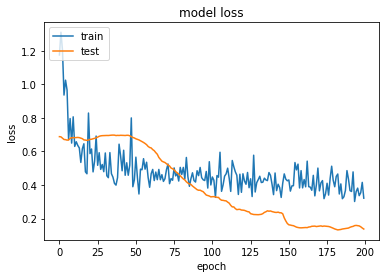

In [15]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Loss_vs_epochs')
plt.show()


In [16]:
# Predicting the Test set results
#y_pred = model.predict(X)
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)
print(y_test)
#print(y)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#cm = confusion_matrix(y, y_pred)
print(cm)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
#score=accuracy_score(y_pred,y)
print(score)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#print(classification_report(y, y_pred))

[[False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]]
[0, 1, 1, 0, 1, 1, 0, 0, 1]
[[4 0]
 [0 5]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0